# 데이터 불러오기


In [1]:
import warnings

warnings.filterwarnings(action='ignore') 

In [2]:
import pandas as pd
ul = pd.read_csv('use_log.csv')
c = pd.read_csv('customer_join.csv')
ul.isnull().sum()
c.isnull().sum()

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

### 클러스터링을 활용한 회원 그룹화(K-Means)


In [3]:
c.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [4]:
cc = c[['mean', 'median', 'max', 'min', 'membership_period']]
cc.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


### k-means 클러스터링
1. 조건 그룹 개수 설정 : 4개
2. mean, median, max, min 변수는 월 이용 횟수와 관련한 변수이므로 1~8사이값
membership_period를 표준화

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#표준화
sc = StandardScaler()
cc_scaled = sc.fit_transform(cc)
pd.DataFrame(cc_scaled) # mean~min, mem_period 5개 변수 표준화

,0,1,2,3,4
0,-0.281206,-0.133676,0.081177,-0.533620,2.034025
1,-0.140545,-0.133676,-0.379928,-0.021149,2.034025
2,-0.421867,-0.133676,-0.841034,-0.021149,2.034025
3,-0.281206,-0.400393,-0.379928,-0.533620,2.034025
4,-0.796964,-0.667109,-0.841034,-1.046090,2.034025
...,...,...,...,...,...
4187,1.500501,1.466622,0.081177,2.541203,-1.288115
4188,2.625790,2.533488,1.003389,3.566144,-1.288115
4189,1.500501,1.466622,0.081177,2.541203,-1.288115
4190,3.188435,3.066921,1.464494,4.078615,-1.288115


In [9]:
#cc_scaled 데이터를 넣어 클러스터링
kmeans = KMeans(n_clusters=4, random_state=0) # 군집 4개인
clusters = kmeans.fit(cc_scaled)

#클러스터링 변수인 clusters 값을 원본 데이터인 'cc'내에 넣기
cc['cluster'] = clusters.labels_
cc.head()

,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,1
1,5.083333,5.0,7,3,47,1
2,4.583333,5.0,6,3,47,1
3,4.833333,4.5,7,2,47,1
4,3.916667,4.0,6,1,47,1


### 클러스터링 결과 분석

In [13]:
#열 이름을 한글로 바꾸기
cc.rename(columns = {'mean':'월평균값','median':'월중앙값','max':'월최댓값','min':'월최솟값','membership_period':'회원기간'}, inplace=True)
cc

,월평균값,월중앙값,월최댓값,월최솟값,회원기간,cluster
0,4.833333,5.0,8,2,47,1
1,5.083333,5.0,7,3,47,1
2,4.583333,5.0,6,3,47,1
3,4.833333,4.5,7,2,47,1
4,3.916667,4.0,6,1,47,1
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1,0
4188,10.000000,10.0,10,10,1,0
4189,8.000000,8.0,8,8,1,0
4190,11.000000,11.0,11,11,1,0


In [14]:
#cluster를 기준으로 데이터 개수 세기
cc.groupby('cluster').count()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,840,840,840,840,840
1,1249,1249,1249,1249,1249
2,771,771,771,771,771
3,1332,1332,1332,1332,1332


In [15]:
#그룹별 특징을 알아보자! -그룹별 평균값
cc.groupby('cluster').mean()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,8.061942,8.047024,10.014286,6.175000,7.019048
1,4.677561,4.670937,7.233787,2.153723,36.915933
2,3.065504,2.900130,4.783398,1.649805,9.276265
3,5.539535,5.391141,8.756006,2.702703,14.867868


### 클러스터링 결과 시각화(차원 축소 활용)

In [16]:
from sklearn.decomposition import PCA
X = cc_scaled.copy()

#객체
pca = PCA(n_components=2)

#적용
pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[-0.81998232, -1.95909657],
       [-0.70792183, -1.79985685],
       [-1.06149902, -1.65982605],
       ...,
       [ 3.02793307,  1.13963534],
       [ 6.08311415,  0.58470806],
       [ 5.06472045,  0.76968382]])

In [17]:
#x_pca를 보기 쉽게 데이터프레임으로 만들기
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = cc['cluster']
pca_df.head()

,0,1,cluster
0,-0.819982,-1.959097,1
1,-0.707922,-1.799857,1
2,-1.061499,-1.659826,1
3,-1.160764,-1.810139,1
4,-2.017132,-1.670101,1


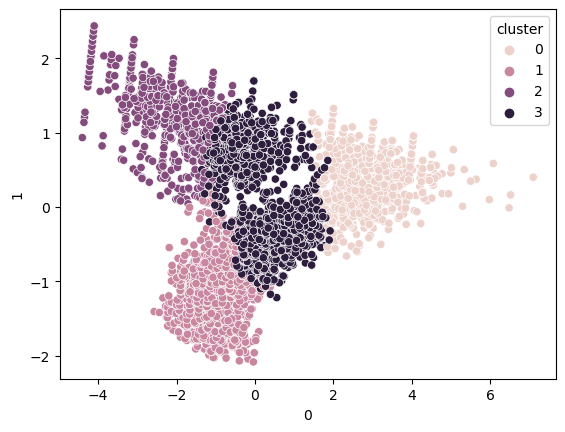

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
axs = plt.subplots()
axs = sns.scatterplot(0,1,hue='cluster', data=pca_df)

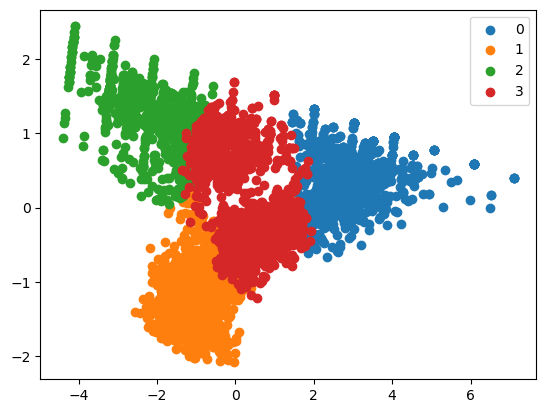

In [19]:
for i in sorted(pca_df['cluster'].unique()):
    tmp = pca_df.loc[pca_df['cluster'] == i] #해당하는 클러스터 번호일 때 그림을 그리고 for문 실행하여 덧그림
    plt.scatter(tmp[0], tmp[1])
    plt.legend(sorted(pca_df['cluster'].unique()))

### 클러스터별 회원 특징 파악(탈퇴, 정기적 이용 여부)

In [20]:
#앞서 만든 cc에서 지속/탈퇴회원 여부를 알아야 하므로 'is_deleted' 열을 추가한다. (이 열은 c데이터에 있으므로 둘을 조인)
#'is_deleted = 1 탈퇴, 0=지속'
cc_join=pd.concat([cc,c], axis=1)
cc_join.head()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간,cluster,customer_id,name,class,gender,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,4.833333,5.0,8,2,47,1,OA832399,XXXX,C01,F,...,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,5.083333,5.0,7,3,47,1,PL270116,XXXXX,C01,M,...,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,4.583333,5.0,6,3,47,1,OA974876,XXXXX,C01,M,...,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,4.833333,4.5,7,2,47,1,HD024127,XXXXX,C01,F,...,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,3.916667,4.0,6,1,47,1,HD661448,XXXXX,C03,F,...,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [21]:
newdf = cc_join.groupby(['cluster', 'is_deleted'], as_index=False).count()[['cluster', 'is_deleted', 'customer_id']]
newdf

,cluster,is_deleted,customer_id
0,0,0,821
1,0,1,19
2,1,0,1231
3,1,1,18
4,2,1,771
5,3,0,790
6,3,1,542


In [23]:
#위의 newdf에서 cluster별 탈퇴 및 미탈퇴회원 비율을 for문으로 뽑아보자
de0 = (newdf['is_deleted'] == 0) #지속회원
de1 = (newdf['is_deleted'] == 1) #탈퇴회원

for i in range(0,4):
    tmp = (newdf['cluster']==i)
    print('Cluster '+ str(i) + '의 탈퇴회원 비율은 ' + str(round((newdf.loc[(tmp & de1), 'customer_id'].sum() / newdf.loc[tmp, 'customer_id'].sum())*100,2)) + '%')
    print('Cluster ' + str(i) + '의 지속회원 비율은 ' + str(round((newdf.loc[(tmp & de0), 'customer_id'].sum() / newdf.loc[tmp, 'customer_id'].sum()) *100,2)) +'%')
    print('  ')
print(tmp & de1)

Cluster 0의 탈퇴회원 비율은 2.26%
Cluster 0의 지속회원 비율은 97.74%
  
Cluster 1의 탈퇴회원 비율은 1.44%
Cluster 1의 지속회원 비율은 98.56%
  
Cluster 2의 탈퇴회원 비율은 100.0%
Cluster 2의 지속회원 비율은 0.0%
  
Cluster 3의 탈퇴회원 비율은 40.69%
Cluster 3의 지속회원 비율은 59.31%
  
0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool


In [26]:
newdf2 = cc_join.groupby(['cluster','routine_flg'], as_index=False).count()[['cluster', 'routine_flg', 'customer_id']]
newdf2

,cluster,routine_flg,customer_id
0,0,0,52
1,0,1,788
2,1,0,2
3,1,1,1247
4,2,0,499
5,2,1,272
6,3,0,226
7,3,1,1106


In [29]:
flag0 = (newdf2['routine_flg'] == 0) #비정기회원
flag1 = (newdf2['routine_flg'] == 1) #정기회원

for i in range(0,4):
    tmp = (newdf['cluster']==i)
    print('Cluster '+ str(i) + '의 정기회원 비율은 ' + str(round((newdf2.loc[(tmp & flag1), 'customer_id'].sum() / newdf.loc[tmp, 'customer_id'].sum())*100,2)) + '%')
    print('Cluster ' + str(i) + '의 비정기회원 비율은 ' + str(round((newdf.loc[(tmp & flag0), 'customer_id'].sum() / newdf.loc[tmp, 'customer_id'].sum()) *100,2)) +'%')
    print('  ')
print(tmp & de1)

Cluster 0의 정기회원 비율은 93.81%
Cluster 0의 비정기회원 비율은 97.74%
  
Cluster 1의 정기회원 비율은 99.84%
Cluster 1의 비정기회원 비율은 98.56%
  
Cluster 2의 정기회원 비율은 0.0%
Cluster 2의 비정기회원 비율은 100.0%
  
Cluster 3의 정기회원 비율은 20.42%
Cluster 3의 비정기회원 비율은 40.69%
  
0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool


In [30]:
#먼저 ul데이터로 연월, 회원별로 집계
ul.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [32]:
#datetime 형태로 변경
ul['usedate'] = pd.to_datetime(ul['usedate'])
#usedate -> 연월로 변경
ul['연월'] = ul['usedate'].dt.strftime('%Y-%m')
#이제 연월, 고객id별로 이용횟수를 집계해보자
ul_m = ul.groupby(['연월', 'customer_id'], as_index=False).count()

#새로운 데이터 ul_m
ul_m.head()

,연월,customer_id,log_id,usedate
0,2018-04,AS002855,4,4
1,2018-04,AS009013,2,2
2,2018-04,AS009373,3,3
3,2018-04,AS015315,6,6
4,2018-04,AS015739,7,7


In [33]:
#log_id -> cnt 컬럼명 변경
ul_m.rename(columns = {'log_id':'cnt'}, inplace=True)
#usedate는 필요없다
del ul_m['usedate']
ul_m

,연월,customer_id,cnt
0,2018-04,AS002855,4
1,2018-04,AS009013,2
2,2018-04,AS009373,3
3,2018-04,AS015315,6
4,2018-04,AS015739,7
...,...,...,...
36837,2019-03,TS995853,8
36838,2019-03,TS998593,8
36839,2019-03,TS999079,3
36840,2019-03,TS999231,6


In [34]:
#ul_m 데이터는 저장
ul_m.to_csv('use_log_months.csv', index=False)

In [41]:
#2018.04 ~ 2019.03 데이터 과거 6개월분
year_months = list(ul_m['연월'].unique())
pred_data = pd.DataFrame()

year_months

['2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03']

In [42]:
#year_month의 2018-10부터 뽑아야 하므로 6부터 끝까지
for i in range(6, len(year_months)):
    #해당월인 것 하나씩 뽑아 임시 데이터프레임 tmp에 저장
    tmp = ul_m.loc[ul_m['연월'] == year_months[i]]
    #tmp의 cnt를 cnt_pred로 변경 (얘가 예측하려고하는 데이터)
    tmp.rename(columns = {'cnt':'cnt_pred'}, inplace=True)
    
    #그리고 여기서는 tmp하나의 달에 대응하는 그 이전 6개월 분의 데이터(tmp_before)를 만든다
    for j in range(1,7):
        tmp_before = ul_m.loc[ul_m['연월'] == year_months[i-j]]
        del tmp_before['연월']
        
        #tmp_before에는 cnt 열을 과거의 열로 하나씩 채워감
        #예를 들어 2018년 10월에 대응하는 tmp_before는 2018.04 ~ 2018.09이다. 2018년 9월부터 역순으로 cnt 0, cnt1, ..cnt6
        tmp_before.rename(columns = {'cnt':'cnt_{}'.format(j-1)}, inplace=True)
        
        #그리고 tmp와 tmp_before를결합
        tmp = pd.merge(tmp, tmp_before, on = 'customer_id', how='left')
    #이렇게 tmp_before을 전부 뽑아 tmp로 결합 한뒤 pred_data에 tmp를 하나씩 결함 axis=0이므로 row-bind
    pred_data = pd.concat([pred_data, tmp], ignore_index = True)
pred_data

,연월,customer_id,cnt_pred,cnt_0,cnt_1,cnt_2,cnt_3,cnt_4,cnt_5
0,2018-10,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,2018-10,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,2018-10,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,2018-10,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,2018-10,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...
18305,2019-03,TS995853,8,11.0,NaN,NaN,NaN,NaN,NaN
18306,2019-03,TS998593,8,7.0,8.0,7.0,9.0,9.0,9.0
18307,2019-03,TS999079,3,2.0,6.0,9.0,6.0,6.0,4.0
18308,2019-03,TS999231,6,6.0,3.0,8.0,5.0,5.0,4.0


In [45]:
pred_data = pred_data.dropna() #디폴트는 how='any', axis=0 (NaN이 1개라도 포함된 경우 행 전체 삭제)

#인덱스가 바뀌어있지 않으므로 초기화
pred_data = pred_data.reset_index(drop=True) # 이전의 인덱스 버림
pred_data.head()

,연월,customer_id,cnt_pred,cnt_0,cnt_1,cnt_2,cnt_3,cnt_4,cnt_5
0,2018-10,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,2018-10,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
2,2018-10,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
3,2018-10,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
4,2018-10,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0


### 새로운 변수 가공하여 추가

In [46]:
pred_data = pd.merge(pred_data, c[['customer_id','start_date']], on = 'customer_id', how='left')
pred_data.head()

,연월,customer_id,cnt_pred,cnt_0,cnt_1,cnt_2,cnt_3,cnt_4,cnt_5,start_date
0,2018-10,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01
1,2018-10,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01
2,2018-10,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01
3,2018-10,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01
4,2018-10,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01


In [47]:
# datetime 형태로 변경
pred_data['now_date'] = pd.to_datetime(pred_data['연월'], format="%Y-%m-%d")
#start_date도 datetime으로 바꿔주기
pred_data['start_date'] = pd.to_datetime(pred_data['start_date'])

pred_data.head()

,연월,customer_id,cnt_pred,cnt_0,cnt_1,cnt_2,cnt_3,cnt_4,cnt_5,start_date,now_date
0,2018-10,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01
1,2018-10,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01
2,2018-10,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01
3,2018-10,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01
4,2018-10,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01


In [48]:
#이제 start_date, now_date 둘 다 datetime 형태이므로 날짜 연산이 가능 두 날짜의 차이를 계산한 새로운 'period'(단위:month)열을만들자
from dateutil.relativedelta import relativedelta
pred_data['period'] = None #초기화

for i in range(len(pred_data)):
    delta = relativedelta(pred_data['now_date'][i], pred_data['start_date'][i])
    pred_data['period'][i] = delta.years*12 + delta.months
pred_data.head()

,연월,customer_id,cnt_pred,cnt_0,cnt_1,cnt_2,cnt_3,cnt_4,cnt_5,start_date,now_date,period
0,2018-10,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01,23
1,2018-10,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01,35
2,2018-10,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01,39
3,2018-10,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01,16
4,2018-10,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01,12


### 선형회귀 모델링

In [49]:
print(pred_data.shape)
pred_data = pred_data.loc[pred_data['start_date'] >= pd.to_datetime('20180401')]
pred_data.reset_index(inplace=True, drop=True) #인덱스 삭제
print(pred_data.shape)


(15113, 12)
(1702, 12)


In [50]:
#선형회귀 모델 적용
from sklearn import linear_model as lm
import sklearn.model_selection

model = lm.LinearRegression()

#학습할 독립변수
X = pred_data[['cnt_0', 'cnt_1', 'cnt_2', 'cnt_3', 'cnt_4', 'cnt_5', 'period']]
#학습할 종속변수
y = pred_data['cnt_pred']

#학습 : 먼저 train/ test set으로 나눔 (여기서 test set은 validation set을 의미함- 모두 학습에 사용)
## 디폴트로는 train: test 75%:25%로 분할됨
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)
model.fit(X_train,y_train)

LinearRegression()

In [51]:
#검증
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6187819748452399
0.5697325308442214


### 모델에 기여하는 변수 확인

In [53]:
coef = pd.DataFrame({'feature_names':X.columns, 'coefficient':model.coef_})
coef

,feature_names,coefficient
0,cnt_0,0.316783
1,cnt_1,0.205693
2,cnt_2,0.172604
3,cnt_3,0.173258
4,cnt_4,0.110205
5,cnt_5,0.054779
6,period,0.104565


<AxesSubplot:xlabel='feature_names', ylabel='coefficient'>

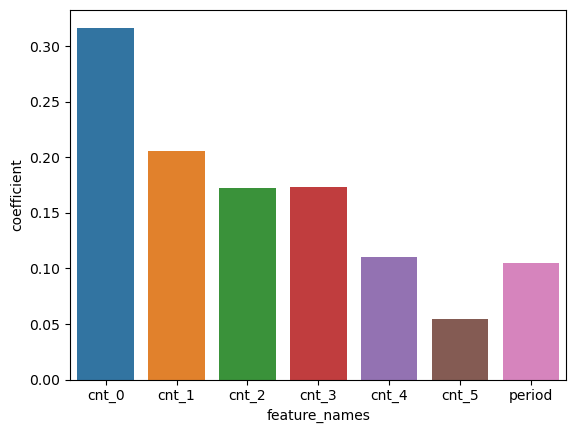

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot('feature_names','coefficient', data=coef)


### 다음달 이용횟수 예측

In [112]:
x1 = [3,4,4,6,8,7,8]
x2 = [2,2,3,3,4,6,8]
x_pred = [x1,x2]

model.predict(x_pred)

array([3.8743689 , 1.95822441])

In [113]:
i = 12
j = 1

tmp = ul_m.loc[ul_m['연월'] == year_months[i-j]]
del tmp['연월']
tmp.rename(columns = {'cnt':'cnt_{}'.format(j-1)}, inplace=True)
tmp.reset_index(inplace=True, drop=True)
tmp


,customer_id,cnt_0
0,AS002855,4
1,AS008805,1
2,AS009373,5
3,AS015233,8
4,AS015315,4
...,...,...
2948,TS995853,8
2949,TS998593,8
2950,TS999079,3
2951,TS999231,6


In [114]:
i = 12
for j in range(2,7):
    tmp_before = ul_m.loc[ul_m['연월'] == year_months[i-j]]
    del tmp_before['연월']
    tmp_before.rename(columns = {'cnt':"cnt_{}".format(j-1)}, inplace=True)
    tmp = pd.merge(tmp, tmp_before, on ='customer_id', how="left")
    
tmp

,customer_id,cnt_0,cnt_1,cnt_2,cnt_3,cnt_4,cnt_5
0,AS002855,4,5.0,6.0,2.0,5.0,3.0
1,AS008805,1,6.0,1.0,5.0,3.0,2.0
2,AS009373,5,6.0,7.0,4.0,4.0,5.0
3,AS015233,8,4.0,9.0,9.0,7.0,7.0
4,AS015315,4,5.0,5.0,5.0,7.0,4.0
...,...,...,...,...,...,...,...
2948,TS995853,8,11.0,NaN,NaN,NaN,NaN
2949,TS998593,8,7.0,8.0,7.0,9.0,9.0
2950,TS999079,3,2.0,6.0,9.0,6.0,6.0
2951,TS999231,6,6.0,3.0,8.0,5.0,5.0


In [115]:
tmp = tmp.dropna()
print(tmp.shape)

(2537, 7)


In [116]:
tmp=pd.merge(tmp,c[['customer_id','start_date']], on='customer_id', how='left')
tmp.head()

,customer_id,cnt_0,cnt_1,cnt_2,cnt_3,cnt_4,cnt_5,start_date
0,AS002855,4,5.0,6.0,2.0,5.0,3.0,2016-11-01
1,AS008805,1,6.0,1.0,5.0,3.0,2.0,2018-06-07
2,AS009373,5,6.0,7.0,4.0,4.0,5.0,2015-11-01
3,AS015233,8,4.0,9.0,9.0,7.0,7.0,2018-05-13
4,AS015315,4,5.0,5.0,5.0,7.0,4.0,2015-07-01


In [119]:
#start_date를 datetime
tmp['start_date'] = pd.to_datetime(tmp['start_date'])

#가입일자가 2018년 4월 이후인 애들만 뽑음 -> 399개로 줄어듦
print(tmp.shape)
tmp = tmp.loc[tmp['start_date'] >= pd.to_datetime('20180401')]
tmp.reset_index(inplace=True, drop=True)
print(tmp.shape)

(2537, 8)
(399, 8)


In [121]:
tmp['now_date'] = pd.to_datetime('20190401')

from dateutil.relativedelta import relativedelta
tmp['period'] = None

for i in range(len(tmp)):
    delta = relativedelta(tmp.loc[i, 'now_date'], tmp.loc[i, 'start_date'])
    tmp.loc[i,'period'] = delta.years*12 + delta.months
tmp.head()

,customer_id,cnt_0,cnt_1,cnt_2,cnt_3,cnt_4,cnt_5,start_date,now_date,period
0,AS008805,1,6.0,1.0,5.0,3.0,2.0,2018-06-07,2019-04-01,9
1,AS015233,8,4.0,9.0,9.0,7.0,7.0,2018-05-13,2019-04-01,10
2,AS093634,9,8.0,7.0,7.0,8.0,10.0,2018-10-07,2019-04-01,5
3,AS100947,3,5.0,9.0,8.0,8.0,9.0,2018-05-12,2019-04-01,10
4,AS115629,1,4.0,4.0,1.0,3.0,4.0,2018-07-04,2019-04-01,8


In [122]:
#필요한 열
tmp_pred = tmp[['cnt_0', 'cnt_1', 'cnt_2','cnt_3','cnt_4','cnt_5','period']]
model.predict(tmp_pred)

array([2.24076414, 6.94000415, 7.13954831, 5.60828621, 1.6591535 ,
       6.85938865, 6.70896647, 6.09113822, 8.30012941, 6.13023259,
       5.74892984, 7.17163746, 1.79480569, 7.79364479, 6.91866859,
       7.015506  , 4.23539599, 7.87687623, 1.94998938, 5.99851558,
       6.79258012, 6.5657267 , 7.63258393, 5.66441918, 1.39934078,
       2.08267234, 7.32378846, 7.00334109, 5.86675557, 6.87299423,
       1.675204  , 1.46173469, 6.29221055, 6.61940961, 6.49264215,
       2.0689267 , 7.37160614, 6.86756008, 7.43810718, 3.28545578,
       6.96819023, 5.74038684, 6.14239201, 2.94620074, 6.77647066,
       6.38823288, 7.34033082, 2.18535463, 6.11197495, 6.86200203,
       2.36755989, 1.7325849 , 6.02508575, 1.58255616, 7.08102939,
       6.75727893, 6.50671184, 6.67605553, 7.78138298, 6.3356167 ,
       7.19500126, 6.47562564, 7.44700128, 7.04586318, 7.16998724,
       7.25866989, 7.32596961, 7.74960112, 7.10176538, 5.71736182,
       1.64992081, 6.32650877, 7.34516664, 2.44027743, 7.70448